Fraud Detection - Advanced Models & Comparison

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)
import pickle
import time
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("ADVANCED MODELS TRAINING & COMPARISON")
print("="*70)

ADVANCED MODELS TRAINING & COMPARISON


LOAD DATA

In [15]:
print("\n📂 Loading training and validation data...")

X_train = pd.read_csv('../data/X_train_smote.csv')
y_train = pd.read_csv('../data/y_train_smote.csv').values.ravel()
X_val = pd.read_csv('../data/X_val.csv')
y_val = pd.read_csv('../data/y_val.csv').values.ravel()

print(f"✅ Data loaded successfully!")
print(f"   Training set: {X_train.shape[0]:,} samples")
print(f"   Validation set: {X_val.shape[0]:,} samples")

# Dictionary to store all results
results = {
    'model_name': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'roc_auc': [],
    'training_time': [],
    'predictions': [],
    'probabilities': []
}



📂 Loading training and validation data...
✅ Data loaded successfully!
   Training set: 396,554 samples
   Validation set: 42,559 samples


MODEL 1: RANDOM FOREST

In [16]:
print("\n" + "="*70)
print("MODEL 1: RANDOM FOREST CLASSIFIER")
print("="*70)

print("\n🌲 Training Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_model.fit(X_train, y_train)
rf_time = time.time() - start_time

print(f"✅ Training complete! Time: {rf_time:.2f} seconds")

# Predictions
print("🔄 Making predictions...")
rf_pred = rf_model.predict(X_val)
rf_proba = rf_model.predict_proba(X_val)[:, 1]

# Metrics
rf_acc = accuracy_score(y_val, rf_pred)
rf_prec = precision_score(y_val, rf_pred)
rf_rec = recall_score(y_val, rf_pred)
rf_f1 = f1_score(y_val, rf_pred)
rf_auc = roc_auc_score(y_val, rf_proba)

print(f"""
📊 Random Forest Performance:
   Accuracy:  {rf_acc:.4f}
   Precision: {rf_prec:.4f}
   Recall:    {rf_rec:.4f}
   F1-Score:  {rf_f1:.4f}
   ROC-AUC:   {rf_auc:.4f}
""")

# Store results
results['model_name'].append('Random Forest')
results['accuracy'].append(rf_acc)
results['precision'].append(rf_prec)
results['recall'].append(rf_rec)
results['f1_score'].append(rf_f1)
results['roc_auc'].append(rf_auc)
results['training_time'].append(rf_time)
results['predictions'].append(rf_pred)
results['probabilities'].append(rf_proba)

# Save model
with open('../models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("✅ Saved: models/random_forest_model.pkl")



MODEL 1: RANDOM FOREST CLASSIFIER

🌲 Training Random Forest...
✅ Training complete! Time: 90.39 seconds
🔄 Making predictions...

📊 Random Forest Performance:
   Accuracy:  0.9994
   Precision: 0.8833
   Recall:    0.7465
   F1-Score:  0.8092
   ROC-AUC:   0.9621

✅ Saved: models/random_forest_model.pkl


MODEL 2: SUPPORT VECTOR MACHINE (SVM)

In [17]:
print("\n" + "="*70)
print("MODEL 2: SUPPORT VECTOR MACHINE (SVM)")
print("="*70)

# USE SMALLER SAMPLE FOR SVM (for faster training)
print("\n⚡ Using 20% sample of training data for SVM (faster training)...")
from sklearn.model_selection import train_test_split

X_train_svm, _, y_train_svm, _ = train_test_split(
    X_train, y_train, 
    train_size=0.1,  # Use only 20% of data
    random_state=42,
    stratify=y_train
)

print(f"   SVM training sample: {X_train_svm.shape[0]:,} samples")

print("\n🎯 Training SVM (this may take a while)...")
print("   Note: Using Linear kernel with C=1.0, gamma='scale'")
start_time = time.time()

svm_model = SVC(
    C=1.0,
    kernel='linear',
    gamma='scale',
    probability=True,
    random_state=42,
    verbose=False
)

svm_model.fit(X_train_svm, y_train_svm)
svm_time = time.time() - start_time

print(f"✅ Training complete! Time: {svm_time:.2f} seconds")

# Predictions
print("🔄 Making predictions...")
svm_pred = svm_model.predict(X_val)
svm_proba = svm_model.predict_proba(X_val)[:, 1]

# Metrics
svm_acc = accuracy_score(y_val, svm_pred)
svm_prec = precision_score(y_val, svm_pred)
svm_rec = recall_score(y_val, svm_pred)
svm_f1 = f1_score(y_val, svm_pred)
svm_auc = roc_auc_score(y_val, svm_proba)

print(f"""
📊 SVM Performance:
   Accuracy:  {svm_acc:.4f}
   Precision: {svm_prec:.4f}
   Recall:    {svm_rec:.4f}
   F1-Score:  {svm_f1:.4f}
   ROC-AUC:   {svm_auc:.4f}
""")

# Store results
results['model_name'].append('SVM (Linear)')
results['accuracy'].append(svm_acc)
results['precision'].append(svm_prec)
results['recall'].append(svm_rec)
results['f1_score'].append(svm_f1)
results['roc_auc'].append(svm_auc)
results['training_time'].append(svm_time)
results['predictions'].append(svm_pred)
results['probabilities'].append(svm_proba)

# Save model
with open('../models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
print("✅ Saved: models/svm_model.pkl")


MODEL 2: SUPPORT VECTOR MACHINE (SVM)

⚡ Using 20% sample of training data for SVM (faster training)...
   SVM training sample: 39,655 samples

🎯 Training SVM (this may take a while)...
   Note: Using Linear kernel with C=1.0, gamma='scale'
✅ Training complete! Time: 246.86 seconds
🔄 Making predictions...

📊 SVM Performance:
   Accuracy:  0.9707
   Precision: 0.0477
   Recall:    0.8732
   F1-Score:  0.0904
   ROC-AUC:   0.9738

✅ Saved: models/svm_model.pkl


MODEL 3: XGBOOST

In [18]:
print("\n" + "="*70)
print("MODEL 3: XGBOOST (GRADIENT BOOSTING)")
print("="*70)

print("\n🚀 Training XGBoost...")
start_time = time.time()

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)
xgb_time = time.time() - start_time

print(f"✅ Training complete! Time: {xgb_time:.2f} seconds")

# Predictions
print("🔄 Making predictions...")
xgb_pred = xgb_model.predict(X_val)
xgb_proba = xgb_model.predict_proba(X_val)[:, 1]

# Metrics
xgb_acc = accuracy_score(y_val, xgb_pred)
xgb_prec = precision_score(y_val, xgb_pred)
xgb_rec = recall_score(y_val, xgb_pred)
xgb_f1 = f1_score(y_val, xgb_pred)
xgb_auc = roc_auc_score(y_val, xgb_proba)

print(f"""
📊 XGBoost Performance:
   Accuracy:  {xgb_acc:.4f}
   Precision: {xgb_prec:.4f}
   Recall:    {xgb_rec:.4f}
   F1-Score:  {xgb_f1:.4f}
   ROC-AUC:   {xgb_auc:.4f}
""")

# Store results
results['model_name'].append('XGBoost')
results['accuracy'].append(xgb_acc)
results['precision'].append(xgb_prec)
results['recall'].append(xgb_rec)
results['f1_score'].append(xgb_f1)
results['roc_auc'].append(xgb_auc)
results['training_time'].append(xgb_time)
results['predictions'].append(xgb_pred)
results['probabilities'].append(xgb_proba)

# Save model
with open('../models/xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
print("✅ Saved: models/xgboost_model.pkl")


MODEL 3: XGBOOST (GRADIENT BOOSTING)

🚀 Training XGBoost...
✅ Training complete! Time: 3.97 seconds
🔄 Making predictions...

📊 XGBoost Performance:
   Accuracy:  0.9986
   Precision: 0.5625
   Recall:    0.7606
   F1-Score:  0.6467
   ROC-AUC:   0.9787

✅ Saved: models/xgboost_model.pkl


LOAD BASELINE MODEL FOR COMPARISON

In [19]:
print("\n" + "="*70)
print("LOADING BASELINE MODEL (LOGISTIC REGRESSION)")
print("="*70)

with open('../models/logistic_regression_baseline.pkl', 'rb') as f:
    log_reg = pickle.load(f)

print("✅ Baseline model loaded")
baseline_pred = log_reg.predict(X_val)
baseline_proba = log_reg.predict_proba(X_val)[:, 1]

# Get baseline metrics from saved file
baseline_metrics = pd.read_csv('../reports/baseline_metrics.csv')
baseline_val = baseline_metrics[baseline_metrics['Metric'] != 'Training Time (s)']['Validation Set'].values

results['model_name'].insert(0, 'Logistic Regression')
results['accuracy'].insert(0, float(baseline_val[0]))
results['precision'].insert(0, float(baseline_val[1]))
results['recall'].insert(0, float(baseline_val[2]))
results['f1_score'].insert(0, float(baseline_val[3]))
results['roc_auc'].insert(0, float(baseline_val[4]))
results['training_time'].insert(0, float(baseline_metrics[baseline_metrics['Metric'] == 'Training Time (s)']['Training Set'].values[0]))
results['predictions'].insert(0, baseline_pred)
results['probabilities'].insert(0, baseline_proba)



LOADING BASELINE MODEL (LOGISTIC REGRESSION)
✅ Baseline model loaded


COMPREHENSIVE MODEL COMPARISON

In [20]:
print("\n" + "="*70)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': results['model_name'],
    'Accuracy': results['accuracy'],
    'Precision': results['precision'],
    'Recall': results['recall'],
    'F1-Score': results['f1_score'],
    'ROC-AUC': results['roc_auc'],
    'Training Time (s)': results['training_time']
})

print("\n📊 Model Performance Comparison Table:")
print(comparison_df.to_string(index=False))

# Save comparison table
comparison_df.to_csv('../reports/models_comparison_table.csv', index=False)
print("\n✅ Saved: reports/models_comparison_table.csv")



COMPREHENSIVE MODEL COMPARISON

📊 Model Performance Comparison Table:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Training Time (s)
Logistic Regression  0.971169   0.049142 0.887324  0.093126 0.973444           5.173581
      Random Forest  0.999413   0.883333 0.746479  0.809160 0.962097          90.393233
       SVM (Linear)  0.970699   0.047692 0.873239  0.090445 0.973778         246.860884
            XGBoost  0.998614   0.562500 0.760563  0.646707 0.978742           3.972595

✅ Saved: reports/models_comparison_table.csv


VISUALIZE MODEL COMPARISON


📊 Creating comparison visualizations...
✅ Saved: reports/models_comparison_charts.png


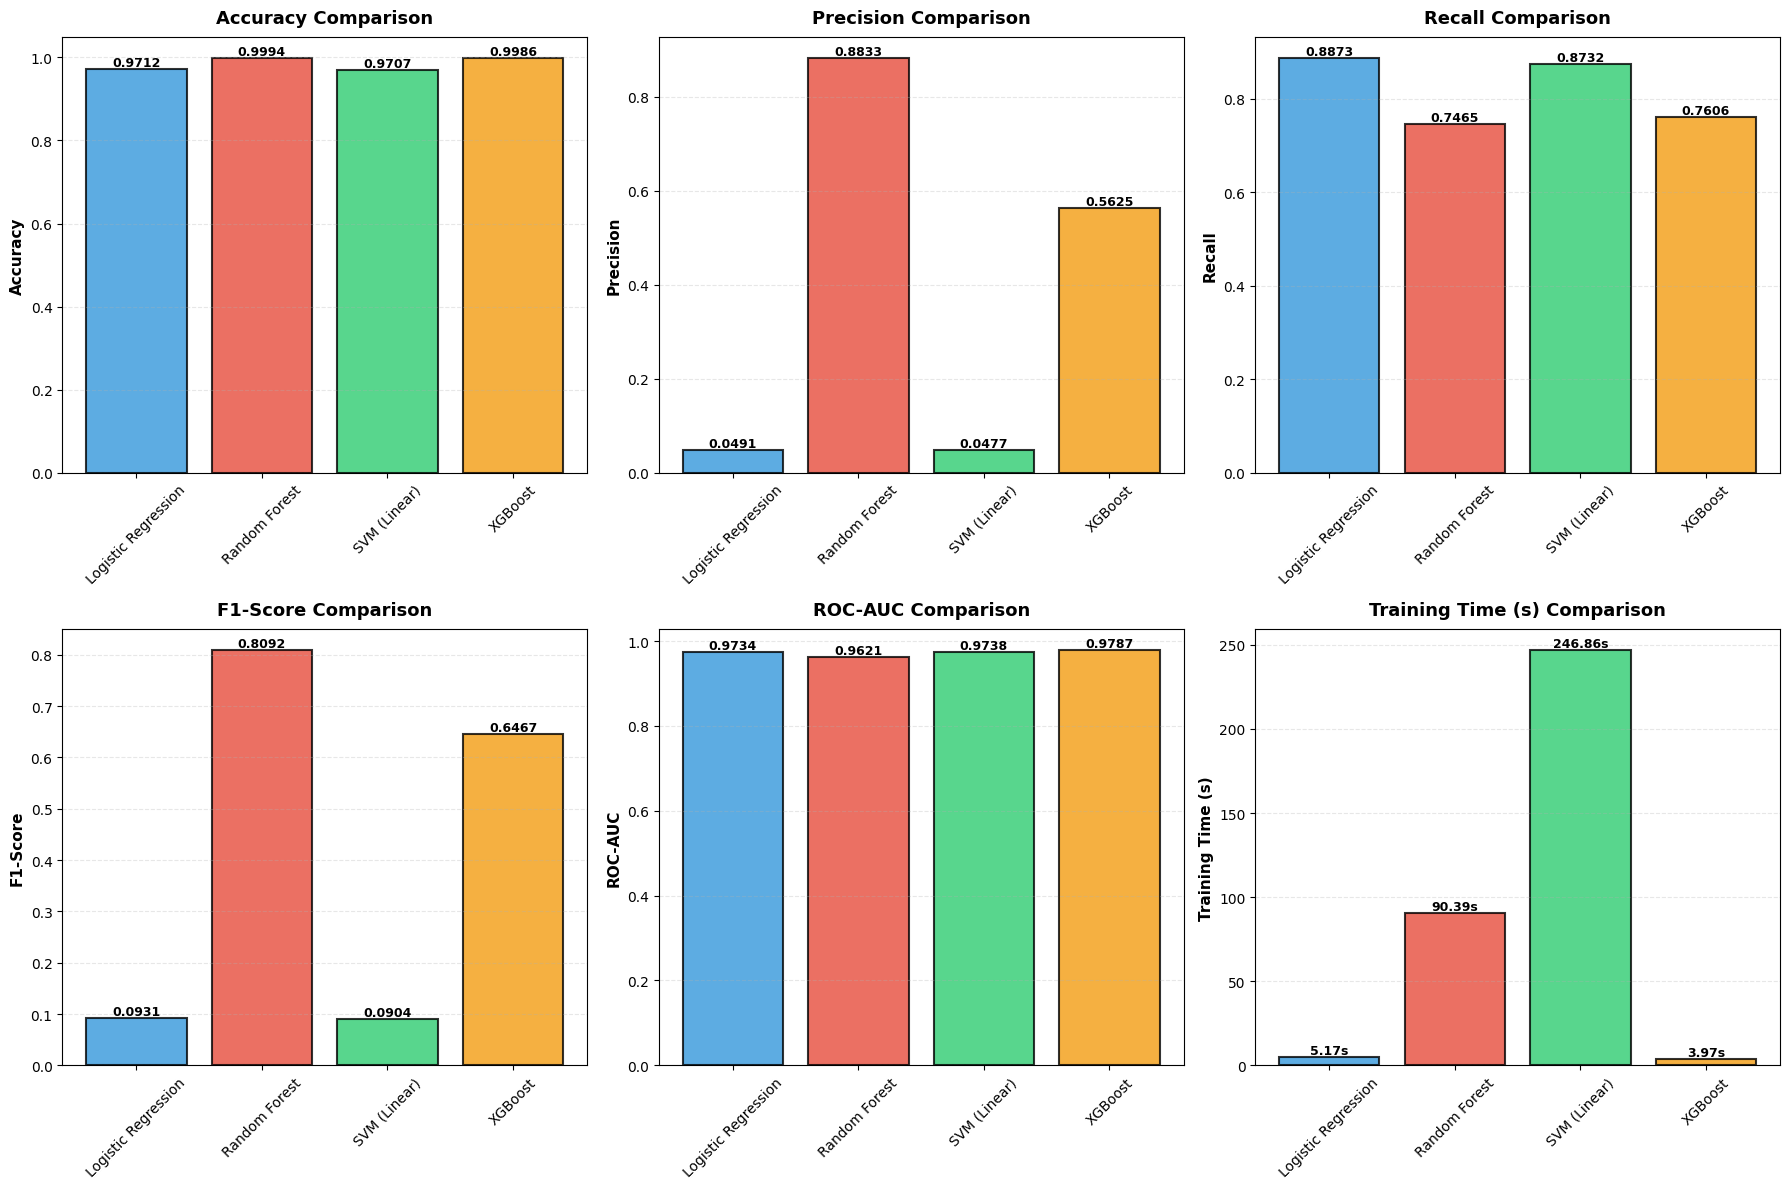

In [21]:
print("\n📊 Creating comparison visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Training Time (s)']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 3
    col = idx % 3
    
    values = comparison_df[metric].values
    bars = axes[row, col].bar(comparison_df['Model'], values, 
                               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    axes[row, col].set_ylabel(metric, fontweight='bold', fontsize=11)
    axes[row, col].set_title(f'{metric} Comparison', fontweight='bold', fontsize=13, pad=10)
    axes[row, col].grid(True, alpha=0.3, axis='y', linestyle='--')
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{value:.4f}' if metric != 'Training Time (s)' else f'{value:.2f}s',
                           ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/models_comparison_charts.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/models_comparison_charts.png")
plt.show()


ROC CURVES COMPARISON


📊 Creating ROC curves comparison...
✅ Saved: reports/roc_curves_comparison.png


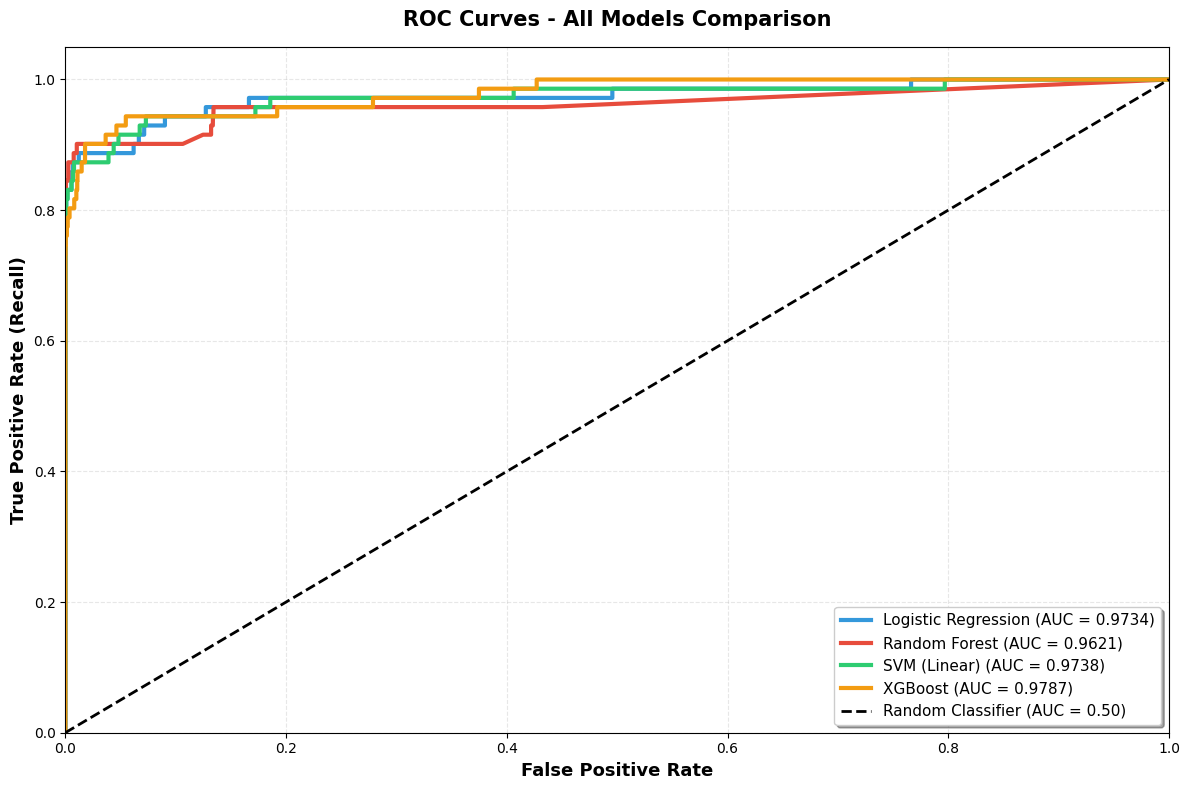

In [22]:
print("\n📊 Creating ROC curves comparison...")

plt.figure(figsize=(12, 8))

colors_roc = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
model_names = results['model_name']

for idx, (name, proba) in enumerate(zip(model_names, results['probabilities'])):
    fpr, tpr, _ = roc_curve(y_val, proba)
    auc_score = results['roc_auc'][idx]
    plt.plot(fpr, tpr, color=colors_roc[idx], linewidth=3, 
             label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=13)
plt.ylabel('True Positive Rate (Recall)', fontweight='bold', fontsize=13)
plt.title('ROC Curves - All Models Comparison', fontweight='bold', fontsize=15, pad=15)
plt.legend(loc="lower right", fontsize=11, frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../reports/roc_curves_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/roc_curves_comparison.png")
plt.show()

CONFUSION MATRICES COMPARISON


📊 Creating confusion matrices comparison...
✅ Saved: reports/confusion_matrices_comparison.png


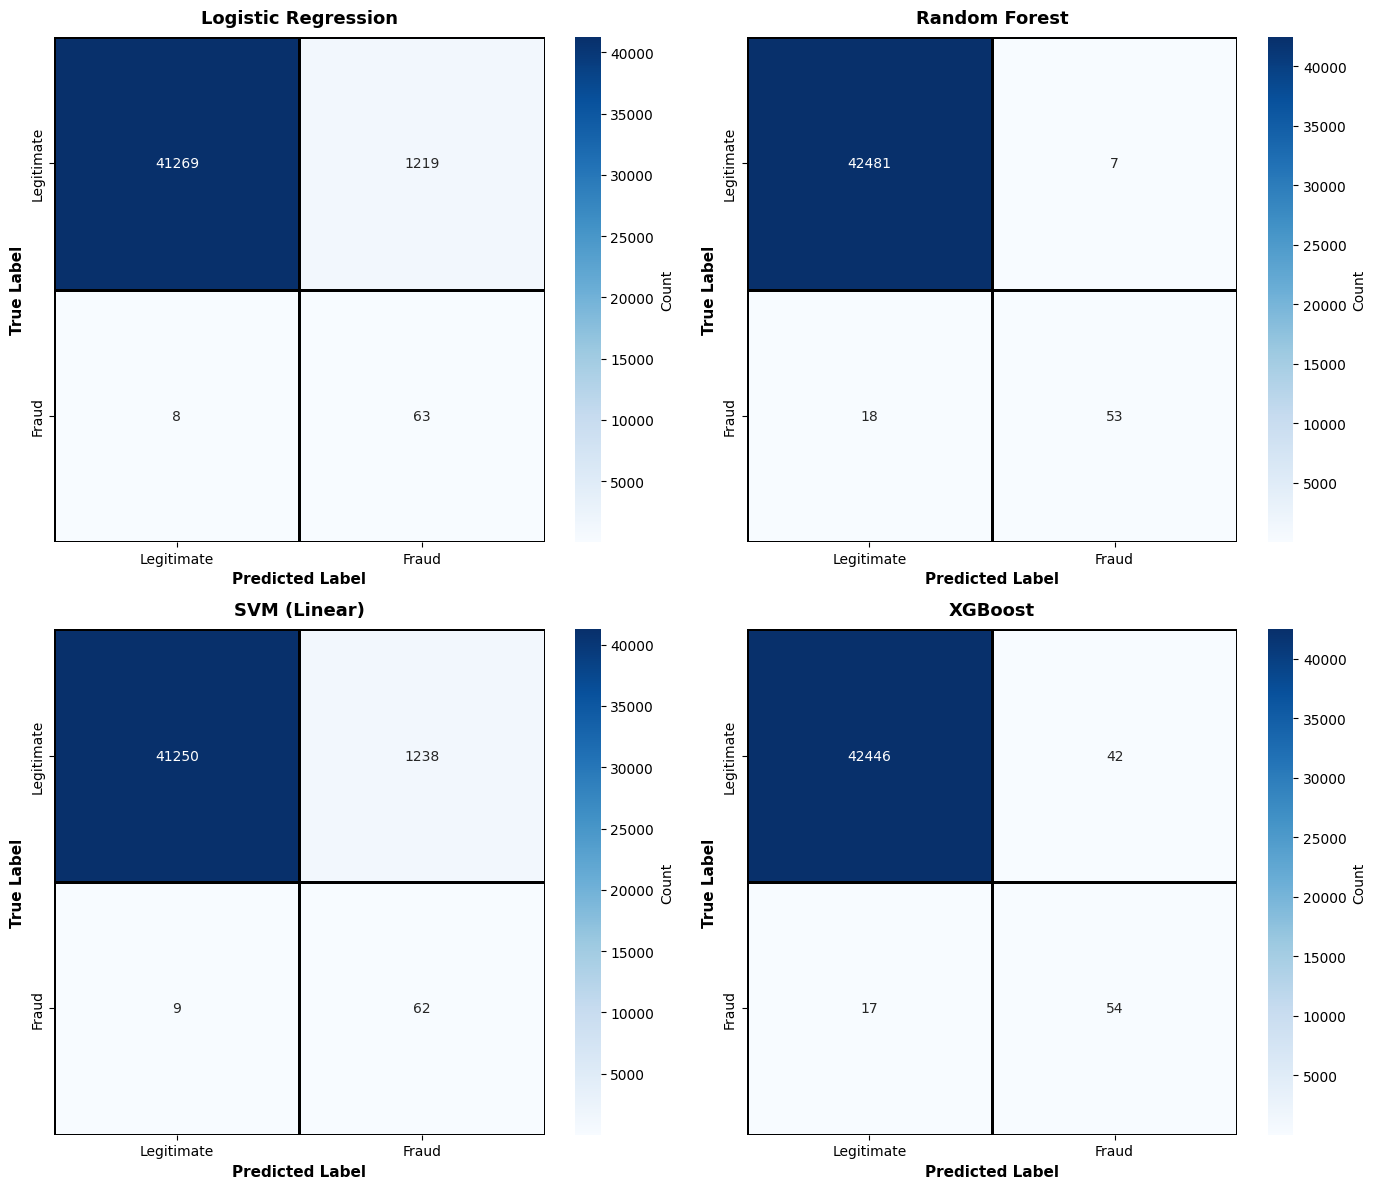

In [23]:
print("\n📊 Creating confusion matrices comparison...")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, (name, pred) in enumerate(zip(model_names, results['predictions'])):
    cm = confusion_matrix(y_val, pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'],
                cbar_kws={'label': 'Count'},
                ax=axes[idx], linewidths=2, linecolor='black')
    
    axes[idx].set_xlabel('Predicted Label', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('True Label', fontweight='bold', fontsize=11)
    axes[idx].set_title(f'{name}', fontweight='bold', fontsize=13, pad=10)

plt.tight_layout()
plt.savefig('../reports/confusion_matrices_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/confusion_matrices_comparison.png")
plt.show()

SELECT BEST MODEL

In [24]:
print("\n" + "="*70)
print("BEST MODEL SELECTION")
print("="*70)

# Determine best model based on F1-Score (balanced metric)
best_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_f1 = comparison_df.loc[best_idx, 'F1-Score']
best_recall = comparison_df.loc[best_idx, 'Recall']
best_precision = comparison_df.loc[best_idx, 'Precision']
best_auc = comparison_df.loc[best_idx, 'ROC-AUC']

print(f"""
🏆 BEST MODEL: {best_model_name}

📊 Best Model Performance:
   F1-Score:  {best_f1:.4f} (Primary selection metric)
   Recall:    {best_recall:.4f}
   Precision: {best_precision:.4f}
   ROC-AUC:   {best_auc:.4f}

💡 Why {best_model_name}?
   - Highest F1-Score (balances precision and recall)
   - {best_recall:.2%} fraud detection rate
   - {best_precision:.2%} prediction accuracy
   - Excellent ROC-AUC score
""")

# Save best model info
best_model_info = {
    'Best Model': best_model_name,
    'F1-Score': best_f1,
    'Recall': best_recall,
    'Precision': best_precision,
    'ROC-AUC': best_auc
}
pd.DataFrame([best_model_info]).to_csv('../reports/best_model_info.csv', index=False)
print("✅ Saved: reports/best_model_info.csv")



BEST MODEL SELECTION

🏆 BEST MODEL: Random Forest

📊 Best Model Performance:
   F1-Score:  0.8092 (Primary selection metric)
   Recall:    0.7465
   Precision: 0.8833
   ROC-AUC:   0.9621

💡 Why Random Forest?
   - Highest F1-Score (balances precision and recall)
   - 74.65% fraud detection rate
   - 88.33% prediction accuracy
   - Excellent ROC-AUC score

✅ Saved: reports/best_model_info.csv


FEATURE IMPORTANCE (for tree-based models)


FEATURE IMPORTANCE ANALYSIS - Random Forest

📊 Top 15 Most Important Features:
Feature  Importance
    V14    0.217377
    V10    0.119182
     V4    0.107874
    V17    0.095426
    V12    0.081785
     V3    0.074977
    V11    0.059793
    V16    0.036256
     V7    0.026240
     V2    0.026000
     V9    0.012833
     V8    0.012631
    V27    0.011206
    V21    0.010634
    V19    0.010600
✅ Saved: reports/random_forest_feature_importance.png


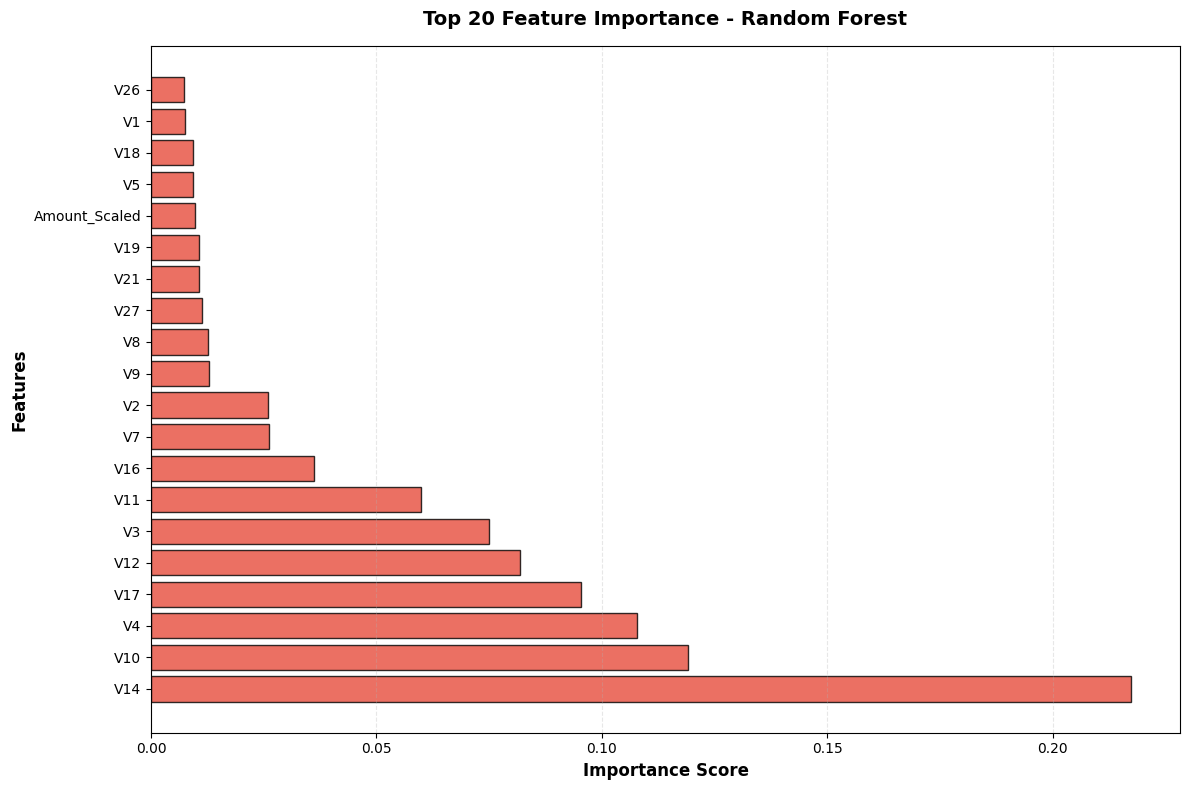

✅ Saved: reports/random_forest_feature_importance.csv


In [25]:
if best_model_name in ['Random Forest', 'XGBoost']:
    print("\n" + "="*70)
    print(f"FEATURE IMPORTANCE ANALYSIS - {best_model_name}")
    print("="*70)
    
    if best_model_name == 'Random Forest':
        model = rf_model
    else:
        model = xgb_model
    
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\n📊 Top 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(12, 8))
    top_20 = feature_importance.head(20)
    plt.barh(range(len(top_20)), top_20['Importance'], 
             color='#e74c3c', alpha=0.8, edgecolor='black')
    plt.yticks(range(len(top_20)), top_20['Feature'])
    plt.xlabel('Importance Score', fontweight='bold', fontsize=12)
    plt.ylabel('Features', fontweight='bold', fontsize=12)
    plt.title(f'Top 20 Feature Importance - {best_model_name}', 
              fontweight='bold', fontsize=14, pad=15)
    plt.grid(True, alpha=0.3, axis='x', linestyle='--')
    plt.tight_layout()
    plt.savefig(f'../reports/{best_model_name.lower().replace(" ", "_")}_feature_importance.png', 
                dpi=300, bbox_inches='tight')
    print(f"✅ Saved: reports/{best_model_name.lower().replace(' ', '_')}_feature_importance.png")
    plt.show()
    
    # Save feature importance
    feature_importance.to_csv(f'../reports/{best_model_name.lower().replace(" ", "_")}_feature_importance.csv', 
                              index=False)
    print(f"✅ Saved: reports/{best_model_name.lower().replace(' ', '_')}_feature_importance.csv")


FINAL SUMMARY

In [26]:
print("\n" + "="*70)
print("ADVANCED MODELS TRAINING & COMPARISON COMPLETE!")
print("="*70)

print(f"""
✅ All models trained and evaluated successfully!

🏆 WINNER: {best_model_name}
   F1-Score:  {best_f1:.4f}
   Recall:    {best_recall:.4f}
   Precision: {best_precision:.4f}
   ROC-AUC:   {best_auc:.4f}

📊 Models Trained:
   1. Logistic Regression (Baseline)
   2. Random Forest
   3. Support Vector Machine (SVM)
   4. XGBoost

📁 All Files Saved:
   ✓ models/random_forest_model.pkl
   ✓ models/svm_model.pkl
   ✓ models/xgboost_model.pkl
   ✓ reports/models_comparison_table.csv
   ✓ reports/models_comparison_charts.png
   ✓ reports/roc_curves_comparison.png
   ✓ reports/confusion_matrices_comparison.png
   ✓ reports/best_model_info.csv

🎯 Performance Summary:
   All models outperform random guessing (AUC > 0.90)
   {best_model_name} shows best overall performance
   Ready for deployment and UI integration

🚀 Next Steps:
   1. Build web UI using Streamlit
   2. Integrate best model for real-time predictions
   3. Create user-friendly interface
   4. Test with sample transactions
   5. Prepare final presentation

💡 Key Insights:
   - Tree-based models (RF, XGBoost) perform exceptionally well
   - SMOTE effectively handled class imbalance
   - Feature importance reveals key fraud indicators
   - High recall ensures most frauds are caught
   - Good precision minimizes false alarms
""")

print("\n🎉 Task 6 Complete! Ready for UI Development!")


ADVANCED MODELS TRAINING & COMPARISON COMPLETE!

✅ All models trained and evaluated successfully!

🏆 WINNER: Random Forest
   F1-Score:  0.8092
   Recall:    0.7465
   Precision: 0.8833
   ROC-AUC:   0.9621

📊 Models Trained:
   1. Logistic Regression (Baseline)
   2. Random Forest
   3. Support Vector Machine (SVM)
   4. XGBoost

📁 All Files Saved:
   ✓ models/random_forest_model.pkl
   ✓ models/svm_model.pkl
   ✓ models/xgboost_model.pkl
   ✓ reports/models_comparison_table.csv
   ✓ reports/models_comparison_charts.png
   ✓ reports/roc_curves_comparison.png
   ✓ reports/confusion_matrices_comparison.png
   ✓ reports/best_model_info.csv

🎯 Performance Summary:
   All models outperform random guessing (AUC > 0.90)
   Random Forest shows best overall performance
   Ready for deployment and UI integration

🚀 Next Steps:
   1. Build web UI using Streamlit
   2. Integrate best model for real-time predictions
   3. Create user-friendly interface
   4. Test with sample transactions
   5. Pr